* 다른 구에 비해 유독 강남쪽에 피부과들이 많은 것 같은데
* 실제로 그러한지 분석해보기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### 파일 불러오기

In [12]:
df = pd.read_csv("data\소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

### 서울에서 상권업종소분류명이 피부과인 것 찾기

In [39]:
df_dermatology = df[(df["상권업종소분류명"] == "피부과") & (df["시도명"] == "서울특별시")]
df_dermatology

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
274,22472541,바롬선릉의원,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010600108970028012595,유경빌딩,서울특별시 강남구 테헤란로64길 24,135280.0,6198.0,NaN,NaN,NaN,127.051430,37.503325
278,22410723,예피부과의원,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1141011100102530003000017,NaN,서울특별시 서대문구 통일로 440,120090.0,3629.0,NaN,2,NaN,126.945072,37.588346
313,25290308,예지원피부과,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1165010700100180003000001,래미안퍼스티지중심상가,서울특별시 서초구 반포대로 287,137040.0,6547.0,NaN,4,NaN,127.001042,37.504342
329,20028847,드림피부과,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010700105830000010367,EGI빌딩,서울특별시 강남구 논현로 843,135892.0,6031.0,NaN,5,NaN,127.027949,37.524381
404,20706128,연세에스병원피부과,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010800101220000007688,세원빌딩,서울특별시 강남구 학동로 110,135010.0,6110.0,NaN,2,NaN,127.023039,37.511356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90412,16243603,피부과더하얀,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1111011900102020001028380,NaN,서울특별시 종로구 세종대로 159,110822.0,3183.0,NaN,5,NaN,126.976329,37.570592
90458,16200731,연세밝은피부과,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1171010200100170004000001,파크리오,서울특별시 송파구 올림픽로37길 130,138933.0,5507.0,A,5,503,127.104481,37.520769
90480,16236651,비앤씨피부과의원,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1144010300100140016002782,NaN,서울특별시 마포구 만리재옛길 12-6,121800.0,4209.0,NaN,2,NaN,126.954983,37.545139
91112,16366507,오가나피부과의원,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010400100030000000001,청담스퀘어,서울특별시 강남구 도산대로 420,135948.0,6062.0,NaN,2,211,127.042042,37.522865


### 구별로 피부과 갯수 확인

In [21]:
a = df_dermatology["시군구명"].value_counts()
a

강남구     159
서초구      73
송파구      18
광진구      16
마포구      15
강동구      15
강서구      15
성북구      14
은평구      13
영등포구     13
중구       12
양천구      12
동대문구     11
서대문구     10
노원구       9
동작구       9
관악구       8
용산구       7
중랑구       6
구로구       5
종로구       3
성동구       3
도봉구       2
강북구       1
금천구       1
Name: 시군구명, dtype: int64

### 시각화해서 보기

<AxesSubplot:xlabel='시군구명', ylabel='count'>

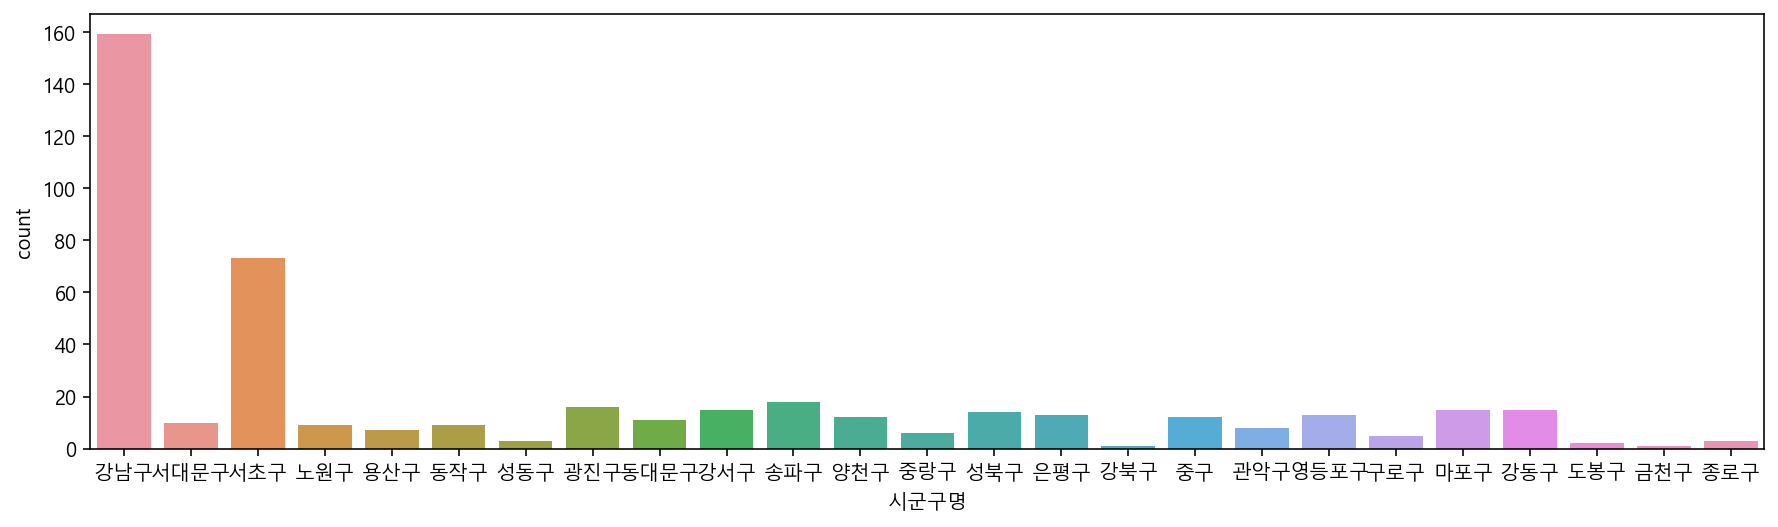

In [27]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_dermatology, x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

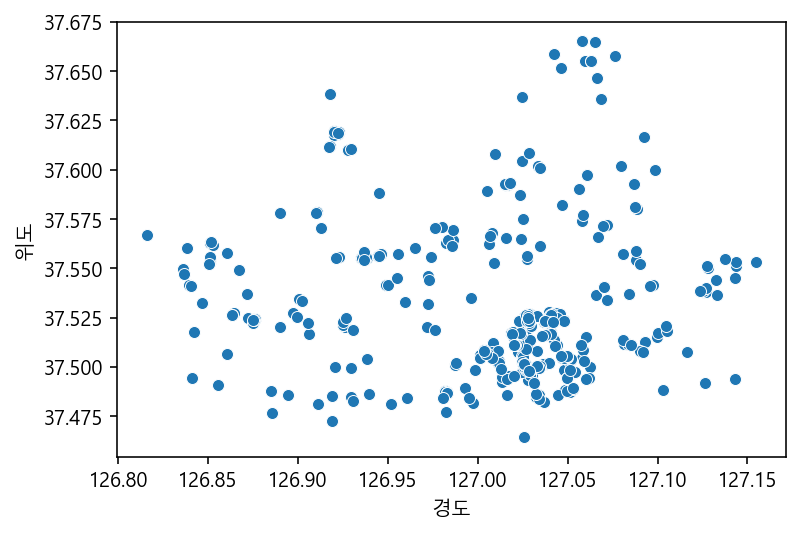

In [30]:

sns.scatterplot(data=df_dermatology, x="경도", y="위도")

In [31]:
import folium

In [32]:
df_dermatology["위도"].mean()
df_dermatology["경도"].mean()

127.01040216459474

### 위도와 경도 평균 이용해 서울시 지도에 표시

In [34]:
map = folium.Map(location=[df_dermatology["위도"].mean(), df_dermatology["경도"].mean()],
                zoom_start=12)

### 서울에 있는 피부과들을 지도에 표시

In [37]:
for n in df_dermatology.index:
    name = df_dermatology.loc[n, "상호명"]
    address = df_dermatology.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_dermatology.loc[n, "위도"].mean(), df_dermatology.loc[n, "경도"].mean()]
    folium.Marker(
        location = location,
        popup = popup
    ).add_to(map)
map

* 다른 위치보다 강남쪽에 피부과가 훨씬 많이 있는 것을 알 수 있다.